In [8]:
import os
from glob import glob
from tqdm import tqdm

import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.frame_utils import extract_frames_from_video

In [10]:
def extract_all_frames(data_split="train", max_frames=20):
   
    video_root = f"../data/WLASL_300/{data_split}"
    save_root = f"../data/frames/{data_split}"

    video_paths = sorted(glob(os.path.join(video_root, "*/*.mp4")))
    print(f"[{data_split}] The number of discovered videos:{len(video_paths)}")

    for video_path in tqdm(video_paths, desc=f"Processing {data_split}"):
        class_name = os.path.basename(os.path.dirname(video_path))
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        save_dir = os.path.join(save_root, class_name, video_name)

        extract_frames_from_video(video_path, save_dir, max_frames=max_frames)

In [11]:
extract_all_frames("train", max_frames=20)

[train] The number of discovered videos:2488


Processing train:   2%|▏         | 57/2488 [00:08<05:38,  7.19it/s][h264 @ 0x7fdae0082b00] Invalid NAL unit size (71678 > 10776).
[h264 @ 0x7fdae0082b00] missing picture in access unit with size 10780
[h264 @ 0x7fdae0b4f2c0] Invalid NAL unit size (71678 > 10776).
[h264 @ 0x7fdae0b4f2c0] Error splitting the input into NAL units.
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x7fdae01c0780] stream 1, offset 0x2a27a7: partial file
Processing train: 100%|██████████| 2488/2488 [06:32<00:00,  6.35it/s]


In [13]:
extract_all_frames("validation", max_frames=20)

[validation] The number of discovered videos:649


Processing validation: 100%|██████████| 649/649 [01:39<00:00,  6.54it/s]


In [14]:
extract_all_frames("test", max_frames=20)

[test] The number of discovered videos:530


Processing test: 100%|██████████| 530/530 [01:12<00:00,  7.29it/s]


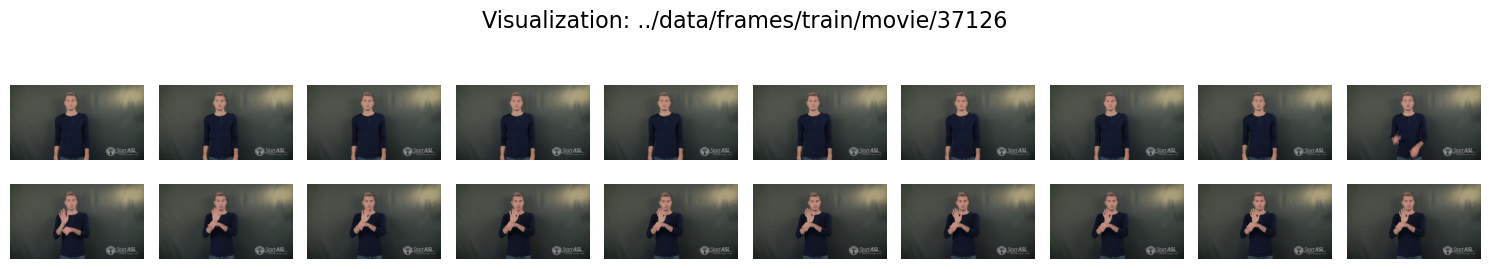

In [15]:
import matplotlib.pyplot as plt
import cv2
import random

# randomly select a video
sample_dir_root = "../data/frames/train"
class_dirs = glob(os.path.join(sample_dir_root, "*"))
random_class = random.choice(class_dirs)
video_dirs = glob(os.path.join(random_class, "*"))
sample_video_dir = random.choice(video_dirs)

# get the path of the frame image
image_paths = sorted(glob(os.path.join(sample_video_dir, "*.jpg")))

# show first 20 frames
num_frames = 20
rows = 2
cols = 10

plt.figure(figsize=(15, 3))

for i, img_path in enumerate(image_paths[:num_frames]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.suptitle(f"Visualization: {sample_video_dir}", fontsize=16)
plt.tight_layout()
plt.show()